In [ ]:
# This tests algorithms to remove cosmic rays from multiepoch spectra (in particular from SDSS stripe 82
# spectra, which are too many for manual removal)

# Created 2021 May 10 by E.S.

In [86]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

%matplotlib inline

In [26]:
file_list = glob.glob("/Users/bandari/Documents/git.repos/rrlyrae_metallicity/" +\
                      "notebooks_for_development/data/sdss_stripe_82_data/input/" + "*")

In [33]:
# find all parent names (i.e., one name for each target, whether or not multiepoch observations were made)

parent_list = list(set([i.split("g00")[0] for i in file_list]))

In [ ]:
# initialize list to hold single-epoch spectra names
## TBD

In [ ]:
#def interp_spectra(spec1, spec2):
#    '''
#    Map second spectra onto the abcissa of the first

In [83]:
resids = np.subtract(df_single_0["flux"],df_single_1["flux"])

In [84]:
filtered_data = sigma_clip(resids, sigma=5, iters=1)

num_removed = np.isnan(filtered_data).sum()

In [85]:
plt.plot(df_single_0["wavel"],resids)
plt.plot(df_single_0["wavel"],filtered_data)
plt.plot(df_single_0["wavel"],df_single_0["flux"])
plt.plot(df_single_1["wavel"],df_single_1["flux"])
plt.title("pts removed: " + str(num_removed))
plt.show()

In [129]:
resids = np.subtract(df_single_0["flux"],df_single_1["flux"])

filtered_data = sigma_clip(resids, sigma=3, iters=2)

diff_roll_p1 = np.subtract(filtered_data,np.roll(filtered_data,1))
diff_roll_p2 = np.subtract(filtered_data,np.roll(filtered_data,2))
diff_roll_n1 = np.subtract(filtered_data,np.roll(filtered_data,-1))
diff_roll_n2 = np.subtract(filtered_data,np.roll(filtered_data,-2))

test = np.subtract(np.subtract(diff_roll_p1,diff_roll_p2),np.subtract(diff_roll_n1,diff_roll_n2))

## CONTINUE HERE; USE THE INDICES WHERE TEST IS FINITE TO SELECT THE INDICES IN THE SPECTRA

In [130]:
test

masked_array(data=[4.448099999999997, -15.967500000000001,
                   15.120000000000005, 9.152999999999999,
                   -28.155499999999996, 20.0499, -0.16579999999999728,
                   -13.625299999999996, --, --, --, --, --,
                   26.16600000000001, -2.9196000000000097, -16.6785,
                   10.046000000000006, 0.9969000000000037,
                   -11.529800000000009, 3.0709000000000017,
                   5.338900000000002, -4.755300000000005,
                   0.014899999999997249, -5.218899999999994, 15.7357,
                   -4.544400000000005, -8.155199999999997,
                   6.347799999999998, 5.039100000000003,
                   -8.929299999999998, -2.0135999999999967,
                   7.149199999999993, -3.116499999999995,
                   -7.832599999999999, 6.223999999999997,
                   -5.531599999999997, 3.736799999999988,
                   11.934200000000011, --, --, --, --, --,
                   -10.9906

In [126]:
filtered_data

masked_array(data=[4.557000000000002, 2.1647999999999996, -3.692,
                   4.1396000000000015, -8.5882, -11.8844,
                   8.439499999999995, 1.1173999999999964,
                   4.579399999999993, -2.1192000000000064, --,
                   6.114899999999999, -9.490100000000005,
                   -11.775699999999993, 8.864200000000004,
                   -1.6968000000000032, 3.5083999999999946,
                   -0.45300000000000296, 0.06199999999999761,
                   -6.140100000000004, 9.351100000000002, 5.7652,
                   6.628399999999999, -4.107500000000002,
                   -0.5364999999999966, 3.8191999999999986, -1.1806,
                   -0.20720000000000027, 3.5923000000000016,
                   2.2443000000000026, -3.7682, 1.3615999999999957,
                   4.723199999999991, 3.586500000000001, 1.5732,
                   6.044200000000004, 0.9568999999999974,
                   8.501799999999996, 0.29400000000000404,
            

In [125]:
diff_roll_1

masked_array(data=[8.1359, -2.3922000000000025, -5.8568,
                   7.831600000000002, -12.727800000000002,
                   -3.296199999999999, 20.323899999999995,
                   -7.322099999999999, 3.461999999999996,
                   -6.698599999999999, --, --, -15.605000000000004,
                   -2.285599999999988, 20.639899999999997,
                   -10.561000000000007, 5.205199999999998,
                   -3.9613999999999976, 0.5150000000000006,
                   -6.2021000000000015, 15.491200000000006,
                   -3.5859000000000023, 0.8631999999999991, -10.7359,
                   3.571000000000005, 4.355699999999995,
                   -4.999799999999999, 0.9733999999999998,
                   3.799500000000002, -1.347999999999999,
                   -6.012500000000003, 5.129799999999996,
                   3.3615999999999957, -1.1366999999999905,
                   -2.013300000000001, 4.471000000000004,
                   -5.087300000000006, 7.

In [122]:
resids

0      4.5570
1      2.1648
2     -3.6920
3      4.1396
4     -8.5882
        ...  
781    5.9759
782    2.4055
783   -2.6380
784   -4.9876
785   -3.5789
Name: flux, Length: 786, dtype: float64

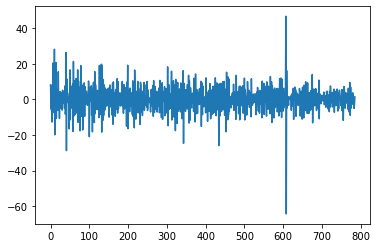

In [121]:
plt.plot(diff_roll_1)
plt.show()

In [117]:
def plot_result(spec0, spec1):
    
    resids = np.subtract(spec0["flux"],spec1["flux"])
    
    # sigma clip
    filtered_data = sigma_clip(resids, sigma=4, iters=2)
    
    # also remove points adjacent to those masked, by rolling spectra by two elements in each direction,
    # subtracting them and finding where difference is nan

    num_removed = np.subtract(len(resids), np.isfinite(filtered_data).sum())
    
    plt.clf()
    fig = plt.figure(figsize=(24,9))
    plt.plot(df_single_0["wavel"],resids,color="red")
    plt.plot(df_single_0["wavel"],filtered_data,color="k")
    plt.plot(df_single_0["wavel"],df_single_0["flux"])
    plt.plot(df_single_1["wavel"],df_single_1["flux"])
    plt.title("pts removed: " + str(num_removed))
    #plt.show()
    string_rand = str(np.random.randint(low=0,high=10000))
    plt.savefig("junk_"+string_rand+".png")
    
    return

In [ ]:
def flag_spec(spec1, spec2):
    '''
    Find residuals between two spectra, find where there is a huge difference one direction or
    the other, and (assuming a cosmic ray hit will make a positive spike the flux) flag that 
    part of the spectrum in question with a column of 'False'
    
    
    (Note there is no interpolation such that the spectra are forced to have the same abcissa,
    but for Stripe 82 data this should be okay.)
    
    INPUTS:
    spec1, spec2: dataframes
    '''
    
    resids = np.subtract(spec1["flux"],spec2["flux"])
    
    

<Figure size 432x288 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

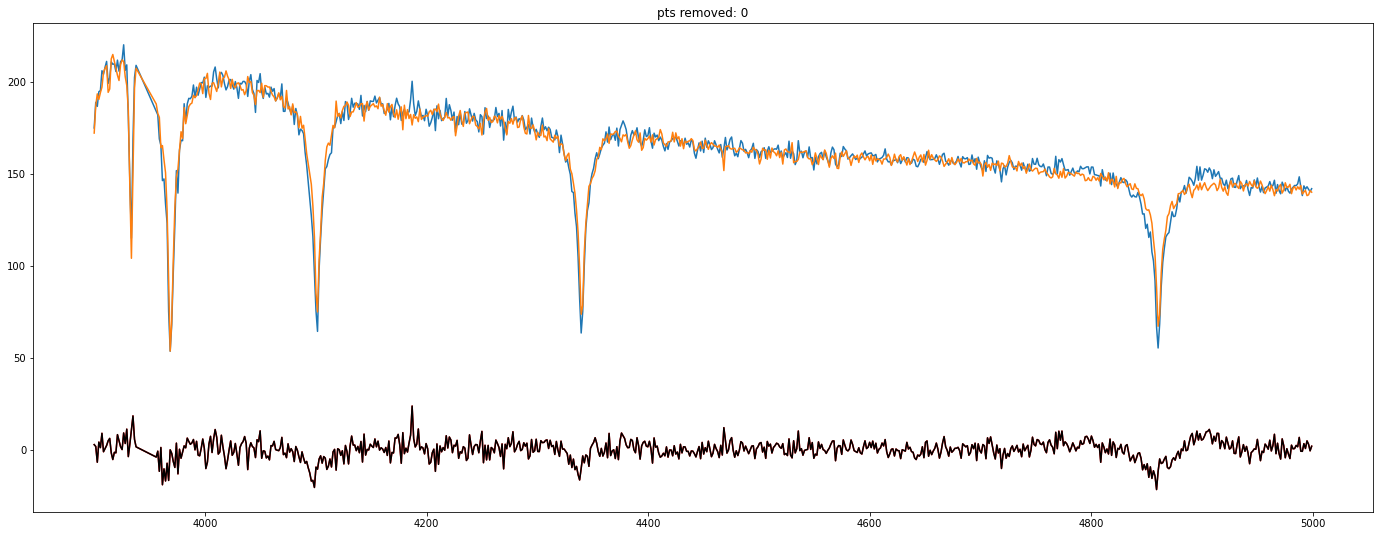

In [119]:
# find the file names of spectra corresponding to each parent; if there is only 1, ignore; 
# if >= 2, do median comparison to flag it for cosmic rays

for t in range(0,40): #len(parent_list)):
    
    #print("----------")
    #print(t)
    matching = list(filter(lambda x: parent_list[t] in x, file_list))
    
    if (len(matching) == 1):
        
        continue
    
    elif (len(matching) == 2):
        
        df_single_0 = pd.read_csv(matching[0], names=["wavel","flux","noise"], delim_whitespace=True)
        df_single_1 = pd.read_csv(matching[1], names=["wavel","flux","noise"], delim_whitespace=True)
        
        plot_result(df_single_0, df_single_1)
        
        
    elif (len(matching) == 3):
        
        df_single_0 = pd.read_csv(matching[0], names=["wavel","flux","noise"], delim_whitespace=True)
        df_single_1 = pd.read_csv(matching[1], names=["wavel","flux","noise"], delim_whitespace=True)
        df_single_2 = pd.read_csv(matching[2], names=["wavel","flux","noise"], delim_whitespace=True)
        
    elif (len(matching) > 3):
        
        continue

In [37]:
parent_list[0]

'/Users/bandari/Documents/git.repos/rrlyrae_metallicity/notebooks_for_development/data/sdss_stripe_82_data/input/spec-2436-54054-0373'